In [1]:
# if jupyterlab:
%matplotlib widget
# if jupyter notebook:
# %matplotlib notebook

import numpy as np 
from recoMRD import recoMRD_B1TFL
from recoMRD import utils
import os

filename = './../example_data/meas_MID00169_FID22881_db_TFLb1_oneInv.mrd'
# filename = './../example_data/meas_MID00019_FID04966_localizer2D_iPAT2.mrd'
mrd = recoMRD_B1TFL(filename)


Number of reference scans: 576
Number of image     scans: 22066
k-space size in protocol: 128 x 64 x 52
image   size in protocol: 64 x 64 x 52
k-space encoding size (64 x 52) differs from max encoding step (63 x 52)
This can be due to parallel imaging, partial Fourier, etc.
Acceleration factor: 2 x 2
Reference scan type: separate
Existing scans: acs, noise, image_scan.
Fully sampled array size=[32, 128, 64, 52, 1, 1, 34, 1, 1, 1, 1]


Filling acs       , size=[32, 128, 24, 24, 1, 1, 1, 1, 1, 1, 1]: 100%|██████████| 576/576 [00:00<00:00, 20612.06it/s]
Filling noise     , size=[32, 128, 1, 1, 1, 1, 1, 1, 1, 1, 1]: 100%|██████████| 16/16 [00:00<00:00, 10890.76it/s]


Hint! Asymmetric echo. RO zero pad index = 32


Filling image_scan, size=[32, 96, 32, 26, 1, 1, 34, 1, 1, 1, 1]: 100%|██████████| 22066/22066 [00:01<00:00, 12097.05it/s]


Operating Mode: 11
Absolute Mode: 4
Relative Mode: 4
Num Tx (Abs, Rel) : 16, 16
Pulse Duration and Inegral: 500, 0

Remove oversampling... Done.
POCS reconstruction along dim = 1 started...


Fourier transform: 100%|██████████| 32/32 [00:08<00:00,  3.81it/s]


In [2]:
acs_img = mrd.kspace['acs']
print(acs_img.shape)
print(np.zeros_like(acs_img[...,0,0,0,0,0,0]).shape)

acs_img = mrd.remove_oversampling(acs_img, is_kspace=True)
coils_sensitivity = mrd.calc_coil_sensitivity(acs_img)


(32, 128, 64, 52, 1, 1, 1, 1, 1, 1, 1)
(32, 128, 64, 52, 1)
Remove oversampling... Done.
Calibration region 32x24x24
Done.


In [3]:
kspace_osremoved = mrd.remove_oversampling(mrd.kspace['image_scan'], is_kspace=True)
print(kspace_osremoved.shape)
print(coils_sensitivity.shape)

Remove oversampling... Done.
(32, 64, 64, 52, 1, 1, 34, 1, 1, 1, 1)
(32, 64, 64, 52, 1)


In [4]:
print(np.prod(kspace_osremoved.shape[4:]))
print(np.prod(kspace_osremoved.shape[5:]))
print(kspace_osremoved.reshape(kspace_osremoved.shape[:4] +(-1,)).shape)
mrd.img = mrd.coil_combination(kspace_osremoved, method='bart', coil_sens=coils_sensitivity)

34
34
(32, 64, 64, 52, 34)


Fourier transform: 100%|██████████| 32/32 [00:12<00:00,  2.64it/s]


Size: 212992 Samples: 31152 Acc: 6.84
l2 regularization: 0.000100
Regularization terms: 1, Supporting variables: 0
conjugate gradients
Total Time: 1.816566
Size: 212992 Samples: 31152 Acc: 6.84
l2 regularization: 0.000100
Regularization terms: 1, Supporting variables: 0
conjugate gradients
Total Time: 1.805869
Size: 212992 Samples: 31152 Acc: 6.84
l2 regularization: 0.000100
Regularization terms: 1, Supporting variables: 0
conjugate gradients
Total Time: 1.977811
Size: 212992 Samples: 31152 Acc: 6.84
l2 regularization: 0.000100
Regularization terms: 1, Supporting variables: 0
conjugate gradients
Total Time: 1.792594
Size: 212992 Samples: 31152 Acc: 6.84
l2 regularization: 0.000100
Regularization terms: 1, Supporting variables: 0
conjugate gradients
Total Time: 1.852378
Size: 212992 Samples: 31152 Acc: 6.84
l2 regularization: 0.000100
Regularization terms: 1, Supporting variables: 0
conjugate gradients
Total Time: 1.929707
Size: 212992 Samples: 31152 Acc: 6.84
l2 regularization: 0.00010

(1, 64, 64, 52, 1, 1, 34, 1, 1, 1, 1)


/kyb/agks/aaghaeifar/.local/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:502: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


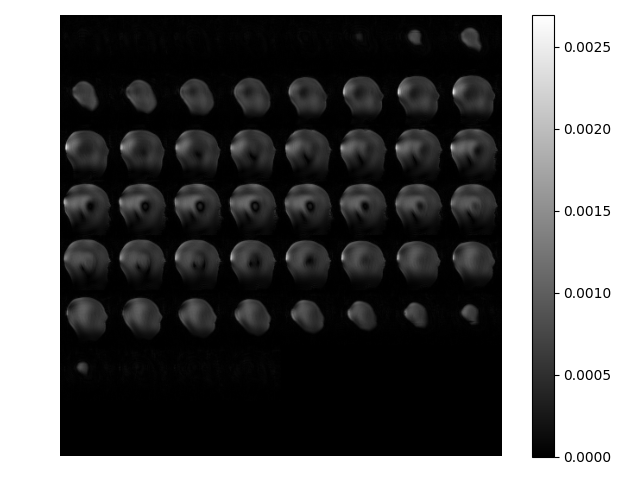

In [7]:
print(mrd.img.shape)
temp = utils.plot_mosaic(mrd.img[0,:,:,:,0,0,0,0,0,...], cmap='gray')